In [1]:
#  import package and data, set wd
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import matplotlib.image as mgimg
# from matplotlib.animation import FuncAnimation
import numpy as np
# from IPython.display import HTML
import os
import math
import pandas as pd

# set work directory
os.chdir('D:\\fault_sensor_data\\python_file')

# data
from read_data_ver2 import *  # notice the version of readdata


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done


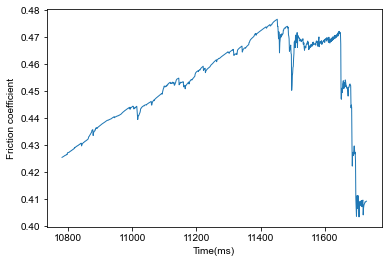

In [2]:
# show which period we plot
index1_ = 7.8e3

index2_ = 8.75e3
individuals_ =    [int(i_ * 2 + 1) for i_ in range(int(286/2))]


#%% plot the area we focus on
plt.rc('font', family = 'Arial')
plt.plot(ConSV_PlateBottomBeadMiddle_.loc[index1_:index2_, 'Time'],  \
         (ConSV_PlateBottomBeadMiddle_.loc[index1_:index2_,'fx'] - ConSV_PlateTopBeadMiddle_.loc[index1_:index2_,'fx'])/ \
         (ConSV_PlateTopBeadMiddle_.loc[index1_:index2_,'fy'] - ConSV_PlateBottomBeadMiddle_.loc[index1_:index2_,'fy']),\
         linewidth = 1)
plt.xlabel('Time(ms)')
plt.ylabel('Friction coefficient')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.savefig('friction coefficient inset.svg', dpi=600, format='svg')
plt.show()

In [ ]:
# make the matrix

v_upboundary_ = np.zeros([len(individuals_), int(index2_ - index1_)]) # up boundary velocity matrix
v_bottomboundary_ = np.zeros([len(individuals_), int(index2_ - index1_)])  # bottom boundary velocity matrix
number_ = np.zeros(len(individuals_))         # record the number of sensors
time_ = np.zeros(int(index2_ - index1_))      # record the correspond time data
for i_ in range(len(individuals_)):
    number_[i_] = i_
    
for index_ in range(int(index2_ - index1_)):
    for i_ in individuals_:
        v_upboundary_[int(i_/2), index_] = sensors_[i_].loc[index_ + index1_, 'vx']        # the velocity in up boundary
        v_bottomboundary_[int(i_/2), index_] = sensors_[i_+1].loc[index_ + index1_, 'vx']  # the velocity in up boundary
    time_[index_] = sensors_[index_].loc[index_ + index1_, 'Time']

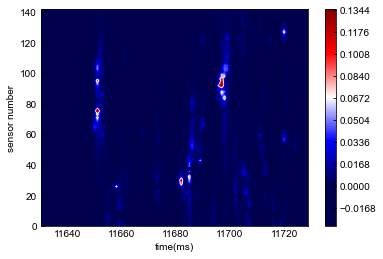

In [10]:
time_matrix_, number_matrix_= np.meshgrid(time_[850:950], number_)



plt.rc('font', family = 'Arial')

plt.contourf(time_matrix_, number_matrix_, v_upboundary_[:,850:950], levels = 1000, cmap = 'seismic', vmin = 0)

plt.ylabel('sensor number')
plt.xlabel('time(ms)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.colorbar()

plt.savefig('nucleation_up_large_slip.png', dpi=600, format='png')
plt.show()

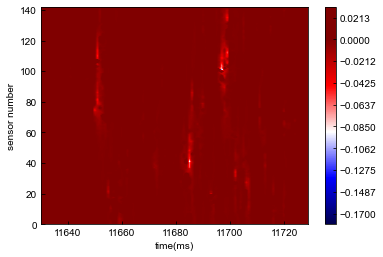

In [12]:
time_matrix_, number_matrix_= np.meshgrid(time_[850:950], number_)

plt.rc('font', family = 'Arial')

plt.contourf(time_matrix_, number_matrix_, v_bottomboundary_[:,850:950], levels = 1000, cmap = 'seismic', vmax = 0)

plt.ylabel('sensor number')
plt.xlabel('time(ms)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.colorbar()

plt.savefig('nucleation_bottom_large_slip.png', dpi=600, format='png')
plt.show()

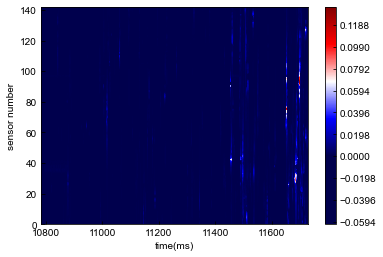

In [13]:
time_matrix_, number_matrix_= np.meshgrid(time_, number_)

plt.rc('font', family = 'Arial')

plt.contourf(time_matrix_, number_matrix_, v_upboundary_, levels = 1000, cmap = 'seismic', vmin = 0)

plt.ylabel('sensor number')
plt.xlabel('time(ms)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.colorbar()

plt.savefig('nucleation.png', dpi=600, format='png')
plt.show()

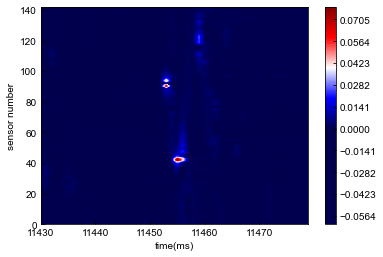

In [14]:
time_matrix_, number_matrix_= np.meshgrid(time_[650:700], number_)

plt.rc('font', family = 'Arial')

plt.contourf(time_matrix_, number_matrix_, v_upboundary_[:,650:700], levels = 1000, cmap = 'seismic', vmin = 0)

plt.ylabel('sensor number')
plt.xlabel('time(ms)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.colorbar()

plt.savefig('nucleation_up_small_slip.png', dpi=600, format='png')
plt.show()

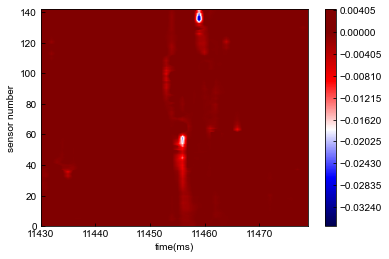

In [15]:
time_matrix_, number_matrix_= np.meshgrid(time_[650:700], number_)

plt.rc('font', family = 'Arial')

plt.contourf(time_matrix_, number_matrix_, v_bottomboundary_[:,650:700], levels = 1000, cmap = 'seismic', vmax = 0)

plt.ylabel('sensor number')
plt.xlabel('time(ms)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.colorbar()

plt.savefig('nucleation_bottom_small_slip.png', dpi=600, format='png')
plt.show()